# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [4]:
import requests
import json

cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
print(cotacoes)

# transforma o json em dicionário (json é um dicionário de forma diferente do python, mas é um dicionário)
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

print('Dólar: {}')

<Response [200]>
{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '4.9317', 'low': '4.8535', 'varBid': '-0.0509', 'pctChange': '-1.03', 'bid': '4.8785', 'ask': '4.8815', 'timestamp': '1653080329', 'create_date': '2022-05-20 17:58:49'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '4.94', 'low': '4.885', 'varBid': '-0.04', 'pctChange': '-0.81', 'bid': '4.75', 'ask': '5.04', 'timestamp': '1653075540', 'create_date': '2022-05-20 16:39:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.8601', 'low': '3.7814', 'varBid': '-0.0436', 'pctChange': '-1.13', 'bid': '3.7999', 'ask': '3.8019', 'timestamp': '1653080395', 'create_date': '2022-05-20 17:59:55'}, 'EUR': {'code': 'EUR', 'codein': 'BRL', 'name': 'Euro/Real Brasileiro', 'high': '5.2269', 'low': '5.1234', 'varBid': '-0.0699', 'pctChange': '-1.34', 'bid': '5.1496', 'ask': '5.1529', 'timestamp': '

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [32]:
for diccotacao in cotacoes_dic:
    print('{} - {} é de {}' .format(diccotacao, cotacoes_dic[diccotacao]['name'], cotacoes_dic[diccotacao]['high']))
    
print('\nDolár é de {}'.format(cotacoes_dic['USD']['bid']))
print('\nEuro é de {}'.format(cotacoes_dic['EUR']['bid']))
print('\nBitcoin é de {}'.format(cotacoes_dic['BTC']['bid']))

USD - Dólar Americano/Real Brasileiro é de 4.9317
USDT - Dólar Americano/Real Brasileiro Turismo é de 4.94
CAD - Dólar Canadense/Real Brasileiro é de 3.8601
EUR - Euro/Real Brasileiro é de 5.2269
GBP - Libra Esterlina/Real Brasileiro é de 6.1624
ARS - Peso Argentino/Real Brasileiro é de 0.0421
BTC - Bitcoin/Real Brasileiro é de 145.261
LTC - Litecoin/Real Brasileiro é de 345.16
JPY - Iene Japonês/Real Brasileiro é de 0.03865
CHF - Franco Suíço/Real Brasileiro é de 5.0871
AUD - Dólar Australiano/Real Brasileiro é de 3.4883
CNY - Yuan Chinês/Real Brasileiro é de 0.7395
ILS - Novo Shekel Israelense/Real Brasileiro é de 1.4776
ETH - Ethereum/Real Brasileiro é de 9.745
XRP - XRP/Real Brasileiro é de 2.05
DOGE - Dogecoin/Real Brasileiro é de 0.418026

Dolár é de 4.8785

Euro é de 5.1496

Bitcoin é de 145.213


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [68]:
cotacao_30dias = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacao_30dias_dic = cotacao_30dias.json()

#print(cotacao_30dias_dic)
#print(cotacao_30dias_dic[0]['bid'])
#print(cotacao_30dias_dic[1]['bid'])

lista_cotacoes_30 = [float(item['bid']) for item in cotacao_30dias_dic]
print(lista_cotacoes_30)

#for i, dias in enumerate(cotacao_30dias_dic):
 #   print(cotacao_30dias_dic[i]['bid'])

#for item in cotacao_30dias_dic:
 #   print(item['bid'])


[4.8785, 4.931, 4.9685, 4.9387, 5.0606, 5.0588, 5.1342, 5.14, 5.1333, 5.1611, 5.0776, 5.0791, 5.0804, 5.0435, 4.9198, 4.9614, 5.0849, 4.9733, 4.9397, 4.9674, 4.999, 4.8774, 4.795, 4.622, 4.6224, 4.6658, 4.6528, 4.6965, 4.6965, 4.7013]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [104]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/200?start_date=20220401&end_date=20220521')
cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]
lista_cotacoes_btc.reverse()
print(lista_cotacoes_btc)
print(len(lista_cotacoes_btc))

[217.842, 215.9, 218.0, 215.993, 213.025, 205.401, 208.521, 200.711, 202.882, 200.638, 187.27, 189.366, 194.343, 188.884, 191.721, 191.719, 188.05, 190.949, 194.746, 192.54, 188.792, 191.62, 190.509, 190.606, 197.622, 191.12, 195.346, 197.312, 192.795, 188.645, 192.293, 195.355, 188.256, 195.505, 185.115, 184.1, 181.907, 175.173, 157.15, 160.658, 149.904, 150.194, 149.469, 154.052, 159.962, 152.0, 151.288, 143.8, 150.384, 143.8, 145.181]
51


#### Gráfico com as cotações do BitCoin

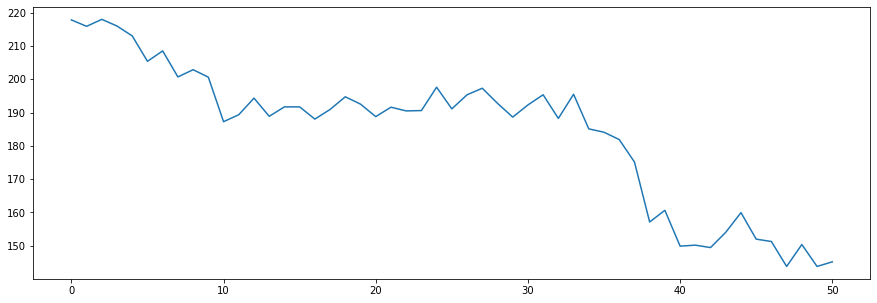

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_btc)
plt.show()